# Geographic breakdown and Analysis of Data Science Job Postings to ai-jobs.net

### Extra data grabbed from the World Bank API

Author: Riley Taylor

Source of ai-jobs.net data science salaries:  https://www.kaggle.com/datasets/sazidthe1/data-science-salaries?resource=download

See the api_call_to_csv.ipynb file for more information on how/what I grabbed from the world bank api. Warning: it's messy, because I only needed to run it once to create the world_bank_api_data.csv. I had plans to do more but time constraints limited the search.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import json
import time
from scipy.stats import linregress
from pathlib import Path

In [2]:
data_science_csv_file_path = Path("../resources/data_science_salaries.csv")
data_science_salaries_df = pd.read_csv(data_science_csv_file_path)

world_bank_api_data_file_path = Path("../resources/world_bank_api_data.csv")
world_bank_api_data_df = pd.read_csv(world_bank_api_data_file_path)

display(data_science_salaries_df.head())


#notice that when we read this from the csv, we get an extra index column, under 'Unnamed: 0'.
#we will have to remove that column
display(world_bank_api_data_df.head())

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


,Unnamed: 0,country,id,year,population,gdp_pc,tech_manu_percent
0,0,United States,US,2022,333287557,76329.582265,17.850454
1,1,Romania,RO,2022,19047009,15786.801742,11.613934
2,2,Portugal,PT,2022,10409704,24515.265851,6.154774
3,3,Lebanon,LB,2022,5489739,NaN,15.133122
4,4,India,IN,2022,1417173173,2410.888021,12.481728


In [4]:
#copying to a separate dataframe to prevent naming collisions, selecting columns as a subset

salaries_df = data_science_salaries_df.copy()
salaries_df = salaries_df[['job_title', 'experience_level', 'employment_type', 'work_models', 'work_year', 'employee_residence', 'company_location', 'salary_in_usd']]
salaries_df.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,company_location,salary_in_usd
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,United States,148100
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,United States,98700
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,United States,140032
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,United States,100022
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,United States,120000


In [6]:
world_bank_df = world_bank_api_data_df.copy()
world_bank_df = world_bank_df[['country', 'id', 'year', 'population', 'gdp_pc', 'tech_manu_percent']]
world_bank_df.head()

,country,id,year,population,gdp_pc,tech_manu_percent
0,United States,US,2022,333287557,76329.582265,17.850454
1,Romania,RO,2022,19047009,15786.801742,11.613934
2,Portugal,PT,2022,10409704,24515.265851,6.154774
3,Lebanon,LB,2022,5489739,NaN,15.133122
4,India,IN,2022,1417173173,2410.888021,12.481728


## Question: Which countries have the highest salaries for data science jobs (by employee residence?)

### Conclusion:



,employee_residence,salary_in_usd
40,Israel,417937.000000
65,Qatar,300000.000000
50,Malaysia,200000.000000
64,Puerto Rico,166000.000000
84,United States,157780.939680
56,New Zealand,151634.333333
12,Canada,140564.883817
68,Saudi Arabia,134999.000000
15,China,125404.000000
9,Bosnia and Herzegovina,120000.000000


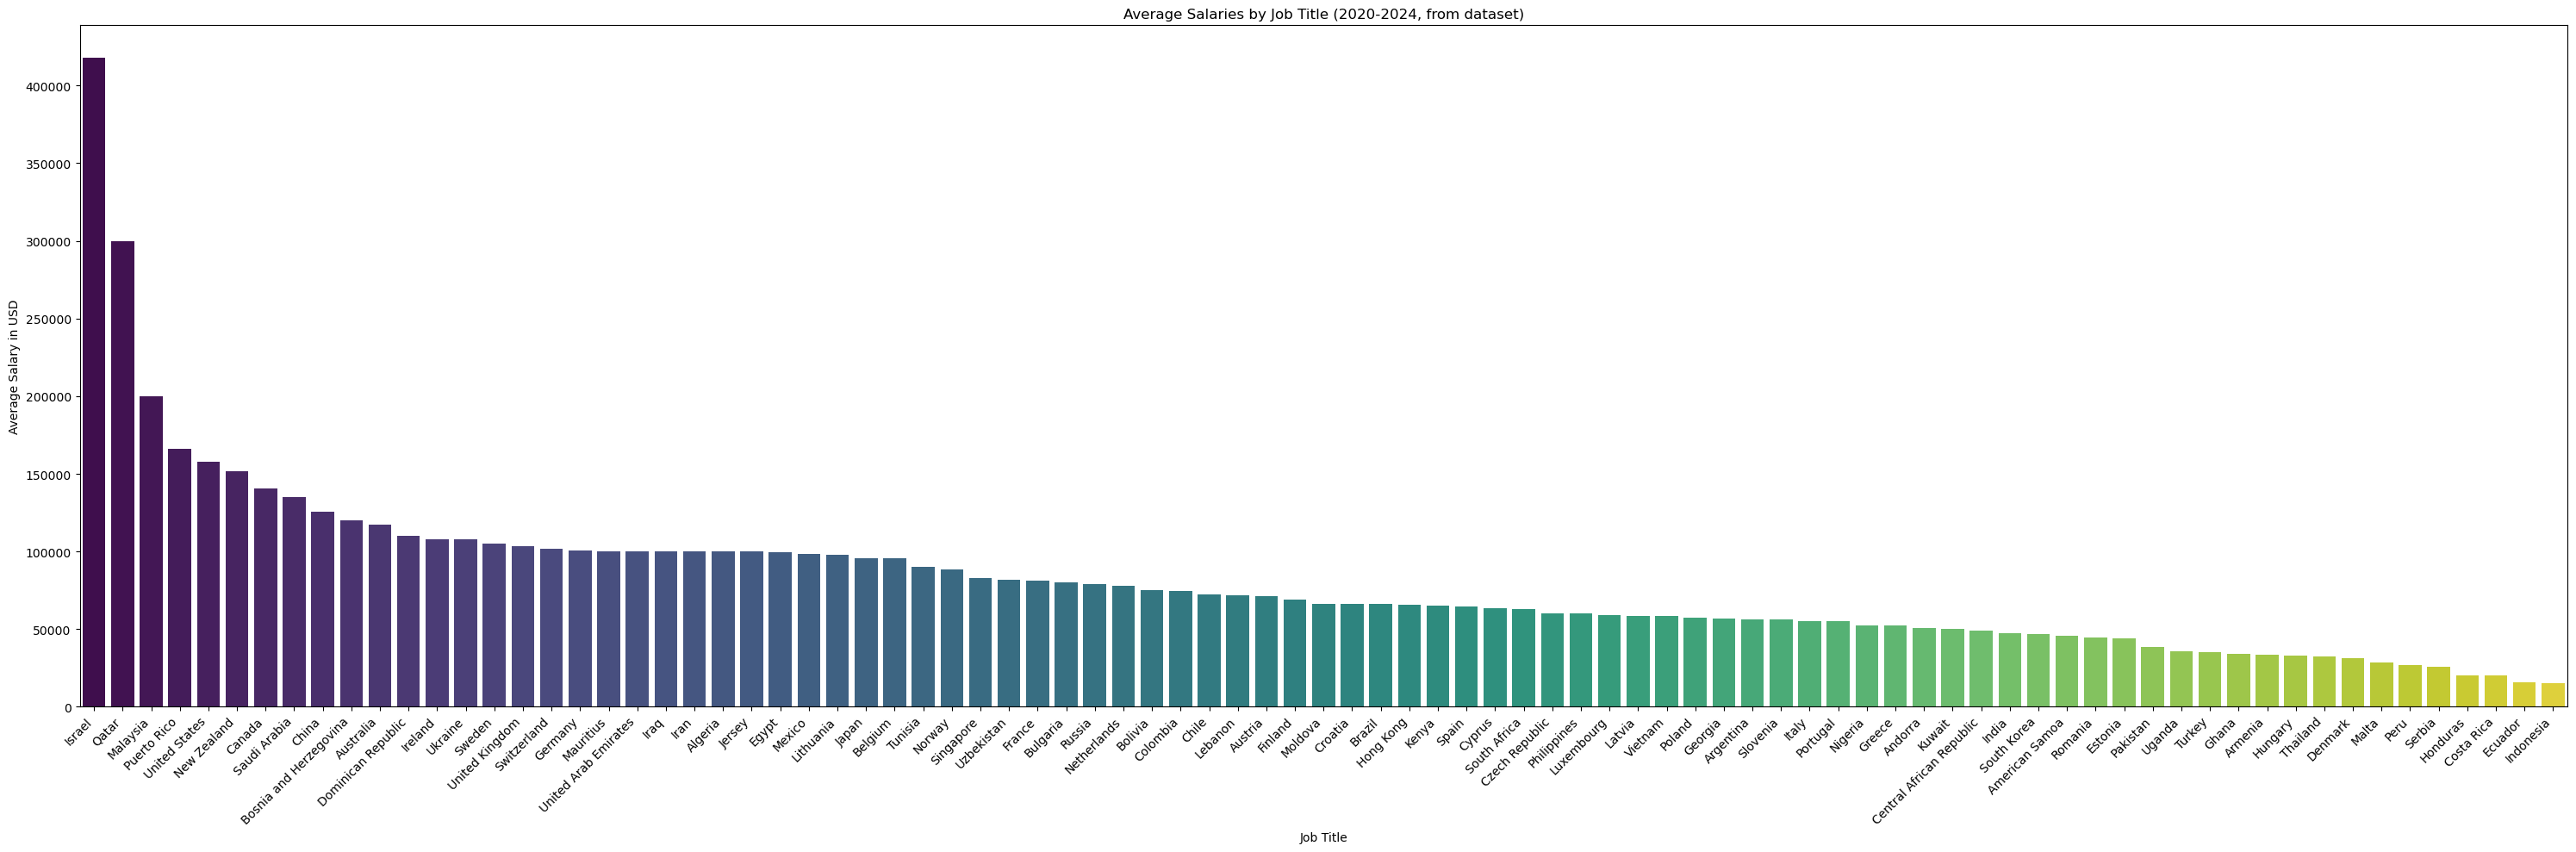

In [21]:
country_employee_salary_df = salaries_df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
sorted_country_employee_salary_df = country_employee_salary_df.sort_values(by='salary_in_usd',ascending=False)

#top 20 countries by data science salaries for employees residing in said country
display(sorted_country_employee_salary_df.head(20))


plt.figure(figsize=(30, 10))
sns.barplot(x='employee_residence', y='salary_in_usd', data=sorted_country_employee_salary_df, palette='viridis')
plt.title(f'Average Salaries by Job Title (2020-2024, from dataset)')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

## Question: Which countries have the highest salaries for data science jobs (by company location?)

### Conclusion:



## Question: Which countries posted the most data science jobs (by employee residence)?

### Conclusion:



## Question: Which countries posted the most data science jobs (by company location)?

### Conclusion:


